In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import obspy as op
import glob
import os
import fnmatch
import shutil
import matplotlib.gridspec as gridspec
from obspy.taup import TauPyModel
import itertools
from obspy import UTCDateTime
import shapefile
from mpl_toolkits.basemap import Basemap


<h3 align="center">Recolhendo as Funções do Receptor Total</h3>

In [3]:
datalistr_all = []
datalistSr_all = []
for root, dirs, files in os.walk('/home/diogo/dados_doutorado/parnaiba_basin/RF_migration/redeBP-BB/event_data/'):
    for datafile in files:
        if datafile.endswith('.eqr'):
            datalistr_all.append(os.path.join(root, datafile))
datalistSr_all = sorted(datalistr_all)

<h3 align="center">Separando as coordenadas dos eventos nas Funções do Receptor</h3>

In [4]:
evla_evlo_list_all = []
evla_evlo_all = []
for i,j in enumerate(datalistSr_all):
    a = op.read(j)
    evla_evlo_list_all.append((a[0].stats.sac.evla,a[0].stats.sac.evlo))

evla_evlo_all = list((set(evla_evlo_list_all)))

evla_1_all = []
evlo_1_all = []
for i,j in enumerate(evla_evlo_all):
    evla_1_all.append(j[0])
    evlo_1_all.append(j[1])

<h3 align="center">Recolhendo as Funções do Receptor</h3>

In [5]:
datalistr = []
datalistSr = []
dir_listr = []
for root, dirs, files in os.walk('/home/diogo/dados_doutorado/parnaiba_basin/RF_migration/redeBP-BB/RF_Zhu_Kanamori/'):
    for datafile in files:
        if datafile.endswith('.eqr'):
            datalistr.append(os.path.join(root, datafile))
datalistSr = sorted(datalistr)

<h3 align="center">Separando as coordenadas dos eventos nas Funções do Receptor</h3>

In [6]:
evla_evlo_list = []
evla_evlo = []
for i,j in enumerate(datalistSr):
    a = op.read(j)
    evla_evlo_list.append((a[0].stats.sac.evla,a[0].stats.sac.evlo))

evla_evlo = list((set(evla_evlo_list)))

evla_1 = []
evlo_1 = []
for i,j in enumerate(evla_evlo):
    evla_1.append(j[0])
    evlo_1.append(j[1])

<h3 align="center">Separando as coordenadas dos eventos no NEIC</h3>


In [7]:
NEIC  = '/home/diogo/dados_doutorado/parnaiba_basin/RF_migration/codes_RF_process_BP/FR_programs/neic.BB'
#Procurando os arquivos .sac nos dados:

event_info = np.genfromtxt(NEIC,delimiter=',',skip_header=1,usecols=[1,2])

evla_0 = [] 
evlo_0 = []

for i,j in enumerate(event_info):
    evla_0.append(j[0])
    evlo_0.append(j[1])


In [8]:
evla_c_0 = [-5]*len(evla_0)
evlo_c_0 = [-45]*len(evlo_0)
evla_c_1 = [-5]*len(evla_1)
evlo_c_1 = [-45]*len(evlo_1)

<h3 align="center">Plotando as coordenadas dos eventos</h3>


/home/diogo/programs/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3260: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/home/diogo/programs/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3269: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)
/home/diogo/programs/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1767: MatplotlibDeprecationWarning: The get_axis_bgcolor function was deprecated in version 2.0. Use get_facecolor instead.
  axisbgc = ax.get_axis_bgcolor()


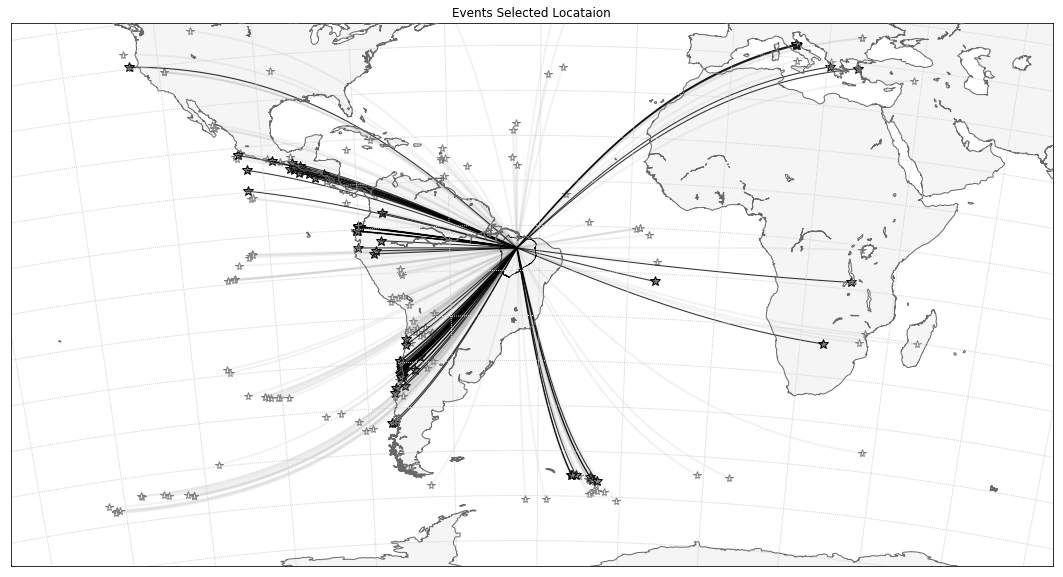

In [9]:
fig=plt.figure(figsize=(20,10))


project_Lat = -5
project_Lon = -45

m = Basemap(resolution='l',projection='eqdc',lat_0=project_Lat, lon_0=project_Lon,llcrnrlon=-170.,
            llcrnrlat=-65.,urcrnrlon=65.,urcrnrlat=55.)


sf = shapefile.Reader('/home/diogo/dados_doutorado/parnaiba_basin/SIG_dados/shapes/bacia_parnaiba/bacia_parnaiba.shp')
for shape in sf.shapes():
    # adding polygon(s)
    parts = list(shape.parts) + [len(shape.points)]
    partlims = zip(parts[:-1], parts[1:])
    for i1, i2 in partlims:
        points = shape.points[i1:i2]
        lon, lat = zip(*points)
        x,y = m(lon, lat)
        m.plot(x, y, '-', lw=0.75, color='k')


for lon, lat in zip(evlo_1_all,evla_1_all):
    x,y = m(lon, lat)
    msize = 8
    m.plot(x, y, '*',markersize=msize,markeredgecolor='grey',markerfacecolor='whitesmoke')

for lon, lat in zip(evlo_1,evla_1):
    x,y = m(lon, lat)
    msize = 10
    m.plot(x, y, '*',markersize=msize,markeredgecolor='k',markerfacecolor='grey')
    
for evlon_0, evlat_0, evlon_c,evlat_c in zip(evlo_1_all,evla_1_all,evlo_c_0,evla_c_0):
    m.drawgreatcircle(evlon_0, evlat_0, evlon_c,evlat_c,linewidth=2,color='grey',alpha=0.1)

for evlon_0, evlat_0, evlon_c,evlat_c in zip(evlo_1,evla_1,evlo_c_0,evla_c_0):
    m.drawgreatcircle(evlon_0, evlat_0, evlon_c,evlat_c,linewidth=1,color='k',alpha=0.8)

    
#m.tissot(project_Lon, project_Lat, 30,100,zorder=10,edgecolor='dimgray',linewidth=1,facecolor='none')
#m.tissot(project_Lon, project_Lat, 90,100,zorder=10,edgecolor='dimgray',linewidth=1,facecolor='none')


m.fillcontinents(color='whitesmoke',lake_color=None)
m.drawcoastlines(color='dimgray',zorder=10)
m.drawmeridians(np.arange(0, 360, 20),color='lightgrey')
m.drawparallels(np.arange(-90, 90, 10),color='lightgrey')

sf = shapefile.Reader('/home/diogo/dados_doutorado/parnaiba_basin/SIG_dados/shapes/bacia_parnaiba/bacia_parnaiba.shp')
for shape in sf.shapes():
    # adding polygon(s)
    parts = list(shape.parts) + [len(shape.points)]
    partlims = zip(parts[:-1], parts[1:])
    for i1, i2 in partlims:
        points = shape.points[i1:i2]
        x, y = zip(*points)
        m.plot(x, y, '-', lw=3, color='k')

plt.title('Events Selected Locataion')

/home/diogo/programs/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3260: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/home/diogo/programs/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3269: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)
/home/diogo/programs/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1623: MatplotlibDeprecationWarning: The get_axis_bgcolor function was deprecated in version 2.0. Use get_facecolor instead.
  fill_color = ax.get_axis_bgcolor()
/home/diogo/programs/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1767: MatplotlibDeprecationWarning: The get_axis_bgcolor function was deprecated in version 2.0. Use get_facecolor instead.
  axisbgc = ax.get_axis_bgcolor()


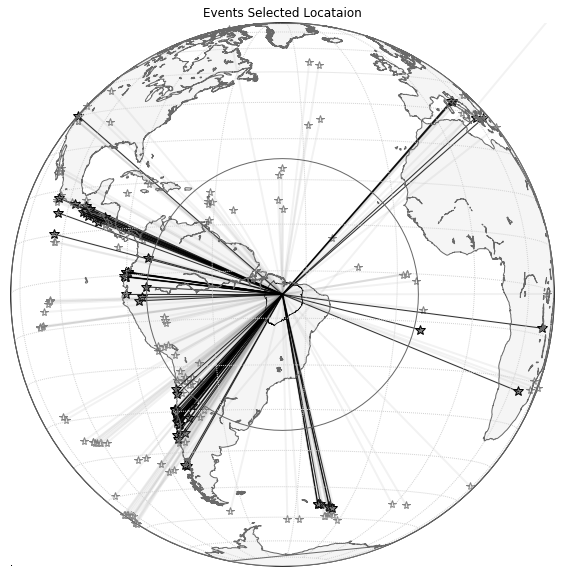

In [10]:
fig=plt.figure(figsize=(20,10))


project_Lat = -5
project_Lon = -45

m = Basemap(resolution='l',projection='ortho',lat_0=project_Lat, lon_0=project_Lon)

sf = shapefile.Reader('/home/diogo/dados_doutorado/parnaiba_basin/SIG_dados/shapes/bacia_parnaiba/bacia_parnaiba.shp')
for shape in sf.shapes():
    # adding polygon(s)
    parts = list(shape.parts) + [len(shape.points)]
    partlims = zip(parts[:-1], parts[1:])
    for i1, i2 in partlims:
        points = shape.points[i1:i2]
        lon, lat = zip(*points)
        x,y = m(lon, lat)
        m.plot(x, y, '-', lw=0.75, color='k')


for lon, lat in zip(evlo_1_all,evla_1_all):
    x,y = m(lon, lat)
    msize = 8
    m.plot(x, y, '*',markersize=msize,markeredgecolor='grey',markerfacecolor='whitesmoke')

for lon, lat in zip(evlo_1,evla_1):
    x,y = m(lon, lat)
    msize = 10
    m.plot(x, y, '*',markersize=msize,markeredgecolor='k',markerfacecolor='grey')
    
for evlon_0, evlat_0, evlon_c,evlat_c in zip(evlo_1_all,evla_1_all,evlo_c_0,evla_c_0):
    m.drawgreatcircle(evlon_0, evlat_0, evlon_c,evlat_c,linewidth=2,color='grey',alpha=0.1)

for evlon_0, evlat_0, evlon_c,evlat_c in zip(evlo_1,evla_1,evlo_c_0,evla_c_0):
    m.drawgreatcircle(evlon_0, evlat_0, evlon_c,evlat_c,linewidth=1,color='k',alpha=0.8)

    
m.tissot(project_Lon, project_Lat, 30,100,zorder=10,edgecolor='dimgray',linewidth=1,facecolor='none')
m.tissot(project_Lon, project_Lat, 90,100,zorder=10,edgecolor='dimgray',linewidth=1,facecolor='none')


m.fillcontinents(color='whitesmoke',lake_color=None)
m.drawcoastlines(color='dimgray',zorder=10)
m.drawmeridians(np.arange(0, 360, 20),color='lightgrey')
m.drawparallels(np.arange(-90, 90, 10),color='lightgrey')

sf = shapefile.Reader('/home/diogo/dados_doutorado/parnaiba_basin/SIG_dados/shapes/bacia_parnaiba/bacia_parnaiba.shp')
for shape in sf.shapes():
    # adding polygon(s)
    parts = list(shape.parts) + [len(shape.points)]
    partlims = zip(parts[:-1], parts[1:])
    for i1, i2 in partlims:
        points = shape.points[i1:i2]
        x, y = zip(*points)
        m.plot(x, y, '-', lw=3, color='k')

plt.title('Events Selected Locataion')

<h3 align="center">Separando as Funções do Receptor pela porcentagem da deconvolução</h3>

/home/diogo/programs/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3260: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/home/diogo/programs/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3269: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)
/home/diogo/programs/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1623: MatplotlibDeprecationWarning: The get_axis_bgcolor function was deprecated in version 2.0. Use get_facecolor instead.
  fill_color = ax.get_axis_bgcolor()
/home/diogo/programs/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1767: MatplotlibDeprecationWarning: The get_axis_bgcolor function was deprecated in version 2.0. Use get_facecolor instead.
  axisbgc = ax.get_axis_bgcolor()


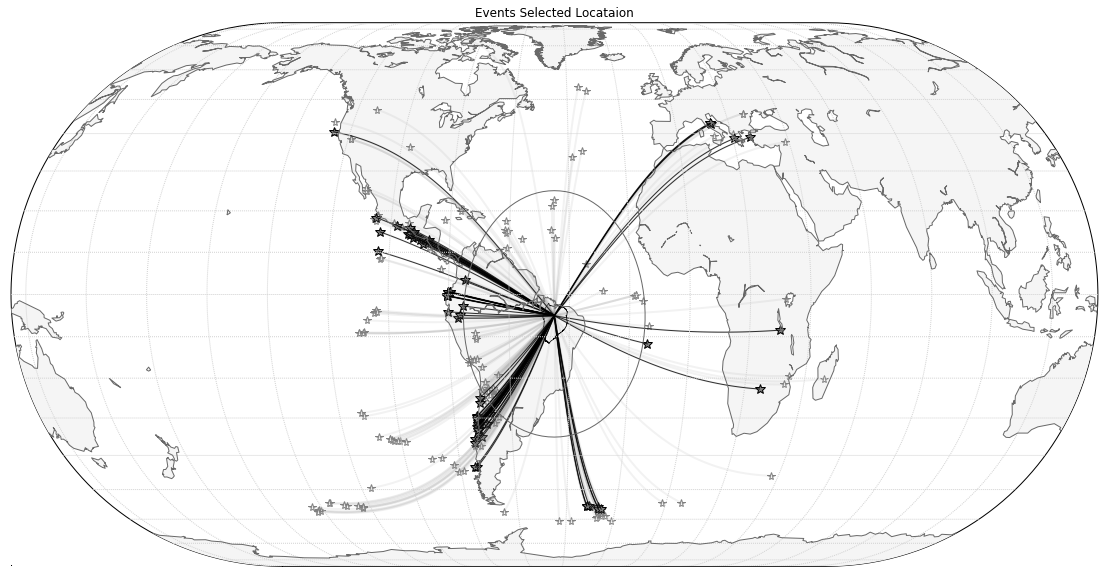

In [11]:
fig=plt.figure(figsize=(20,10))


project_Lat = -5
project_Lon = -45

m = Basemap(projection='eck4',lon_0=project_Lon)

sf = shapefile.Reader('/home/diogo/dados_doutorado/parnaiba_basin/SIG_dados/shapes/bacia_parnaiba/bacia_parnaiba.shp')
for shape in sf.shapes():
    # adding polygon(s)
    parts = list(shape.parts) + [len(shape.points)]
    partlims = zip(parts[:-1], parts[1:])
    for i1, i2 in partlims:
        points = shape.points[i1:i2]
        lon, lat = zip(*points)
        x,y = m(lon, lat)
        m.plot(x, y, '-', lw=0.75, color='k')


for lon, lat in zip(evlo_1_all,evla_1_all):
    x,y = m(lon, lat)
    msize = 8
    m.plot(x, y, '*',markersize=msize,markeredgecolor='grey',markerfacecolor='whitesmoke')

for lon, lat in zip(evlo_1,evla_1):
    x,y = m(lon, lat)
    msize = 10
    m.plot(x, y, '*',markersize=msize,markeredgecolor='k',markerfacecolor='grey')
    
for evlon_0, evlat_0, evlon_c,evlat_c in zip(evlo_1_all,evla_1_all,evlo_c_0,evla_c_0):
    m.drawgreatcircle(evlon_0, evlat_0, evlon_c,evlat_c,linewidth=2,color='grey',alpha=0.1)

for evlon_0, evlat_0, evlon_c,evlat_c in zip(evlo_1,evla_1,evlo_c_0,evla_c_0):
    m.drawgreatcircle(evlon_0, evlat_0, evlon_c,evlat_c,linewidth=1,color='k',alpha=0.8)

    
m.tissot(project_Lon, project_Lat, 30,100,zorder=10,edgecolor='dimgray',linewidth=1,facecolor='none')
#m.tissot(project_Lon, project_Lat, 90,100,zorder=10,edgecolor='dimgray',linewidth=1,facecolor='none')


m.fillcontinents(color='whitesmoke',lake_color=None)
m.drawcoastlines(color='dimgray',zorder=10)
m.drawmeridians(np.arange(0, 360, 20),color='lightgrey')
m.drawparallels(np.arange(-90, 90, 10),color='lightgrey')

sf = shapefile.Reader('/home/diogo/dados_doutorado/parnaiba_basin/SIG_dados/shapes/bacia_parnaiba/bacia_parnaiba.shp')
for shape in sf.shapes():
    # adding polygon(s)
    parts = list(shape.parts) + [len(shape.points)]
    partlims = zip(parts[:-1], parts[1:])
    for i1, i2 in partlims:
        points = shape.points[i1:i2]
        x, y = zip(*points)
        m.plot(x, y, '-', lw=3, color='k')

plt.title('Events Selected Locataion')

/home/diogo/programs/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3260: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/home/diogo/programs/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3269: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)
/home/diogo/programs/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1623: MatplotlibDeprecationWarning: The get_axis_bgcolor function was deprecated in version 2.0. Use get_facecolor instead.
  fill_color = ax.get_axis_bgcolor()
/home/diogo/programs/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1767: MatplotlibDeprecationWarning: The get_axis_bgcolor function was deprecated in version 2.0. Use get_facecolor instead.
  axisbgc = ax.get_axis_bgcolor()


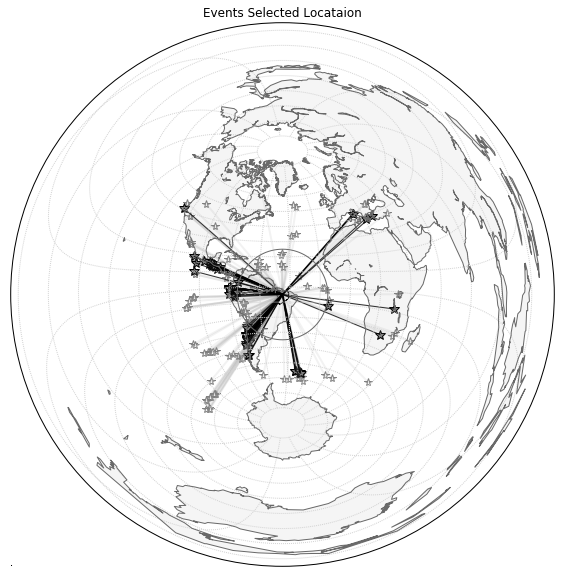

In [12]:
fig=plt.figure(figsize=(20,10))


project_Lat = -5
project_Lon = -45

m = Basemap(projection='aeqd',lon_0=project_Lon,lat_0=project_Lat)

sf = shapefile.Reader('/home/diogo/dados_doutorado/parnaiba_basin/SIG_dados/shapes/bacia_parnaiba/bacia_parnaiba.shp')
for shape in sf.shapes():
    # adding polygon(s)
    parts = list(shape.parts) + [len(shape.points)]
    partlims = zip(parts[:-1], parts[1:])
    for i1, i2 in partlims:
        points = shape.points[i1:i2]
        lon, lat = zip(*points)
        x,y = m(lon, lat)
        m.plot(x, y, '-', lw=0.75, color='k')


for lon, lat in zip(evlo_1_all,evla_1_all):
    x,y = m(lon, lat)
    msize = 8
    m.plot(x, y, '*',markersize=msize,markeredgecolor='grey',markerfacecolor='whitesmoke')

for lon, lat in zip(evlo_1,evla_1):
    x,y = m(lon, lat)
    msize = 10
    m.plot(x, y, '*',markersize=msize,markeredgecolor='k',markerfacecolor='grey')
    
for evlon_0, evlat_0, evlon_c,evlat_c in zip(evlo_1_all,evla_1_all,evlo_c_0,evla_c_0):
    m.drawgreatcircle(evlon_0, evlat_0, evlon_c,evlat_c,linewidth=2,color='grey',alpha=0.1)

for evlon_0, evlat_0, evlon_c,evlat_c in zip(evlo_1,evla_1,evlo_c_0,evla_c_0):
    m.drawgreatcircle(evlon_0, evlat_0, evlon_c,evlat_c,linewidth=1,color='k',alpha=0.8)

    
m.tissot(project_Lon, project_Lat, 30,100,zorder=10,edgecolor='dimgray',linewidth=1,facecolor='none')
#m.tissot(project_Lon, project_Lat, 90,100,zorder=10,edgecolor='dimgray',linewidth=1,facecolor='none')


m.fillcontinents(color='whitesmoke',lake_color=None)
m.drawcoastlines(color='dimgray',zorder=10)
m.drawmeridians(np.arange(0, 360, 20),color='lightgrey')
m.drawparallels(np.arange(-90, 90, 10),color='lightgrey')

sf = shapefile.Reader('/home/diogo/dados_doutorado/parnaiba_basin/SIG_dados/shapes/bacia_parnaiba/bacia_parnaiba.shp')
for shape in sf.shapes():
    # adding polygon(s)
    parts = list(shape.parts) + [len(shape.points)]
    partlims = zip(parts[:-1], parts[1:])
    for i1, i2 in partlims:
        points = shape.points[i1:i2]
        x, y = zip(*points)
        m.plot(x, y, '-', lw=3, color='k')

plt.title('Events Selected Locataion')

/home/diogo/programs/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3260: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/home/diogo/programs/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3269: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)
/home/diogo/programs/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3296: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/home/diogo/programs/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3305: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


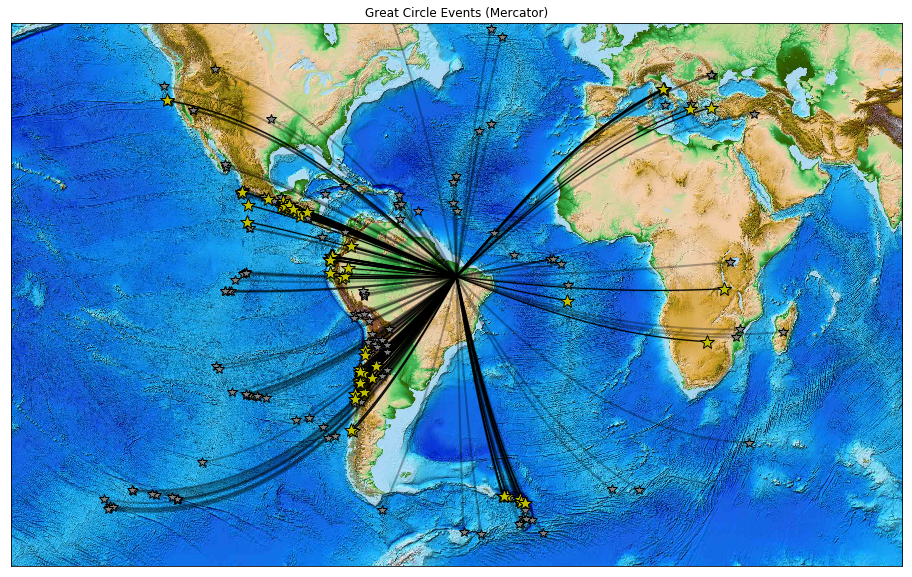

In [13]:
fig=plt.figure(figsize=(20,10))

# small subplot 1
m = Basemap(resolution='c',projection='merc',lat_0=-5, lon_0=-45,llcrnrlon=-170.,
            llcrnrlat=-65.,urcrnrlon=80.,urcrnrlat=55.)

project_Lat = -5
project_Lon = -45
# define the epicentral distance Delta and plot this as a circle on the map:

#m.tissot(project_Lon, project_Lat, 30,100,zorder=10,linestyle='dashed',edgecolor='black',linewidth=1,facecolor='none')
 
for evlon_0, evlat_0, evlon_c,evlat_c in zip(evlo_1_all,evla_1_all,evlo_c_0,evla_c_0):
    m.drawgreatcircle(evlon_0, evlat_0, evlon_c,evlat_c,linewidth=2,color='k',alpha=0.3)

for evlon_0, evlat_0, evlon_c,evlat_c in zip(evlo_1,evla_1,evlo_c_0,evla_c_0):
    m.drawgreatcircle(evlon_0, evlat_0, evlon_c,evlat_c,linewidth=1,color='k')

for lon, lat in zip(evlo_1_all,evla_1_all):
    x,y = m(lon, lat)
    msize = 10
    m.plot(x, y, '*',markersize=msize,markeredgecolor='k',markerfacecolor='grey')

for lon, lat in zip(evlo_1,evla_1):
    x,y = m(lon, lat)
    msize = 15
    m.plot(x, y, '*',markersize=msize,markeredgecolor='k',markerfacecolor='y')
    
m.etopo()
    
plt.title('Great Circle Events (Mercator)')